## Testing the learner concept

In [15]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt

X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')

X,Y = ml.shuffleData(X,Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,0.7)

X_numeric = Xtr[:,:41]
X_discrete = Xtr[:,41:69]
X_binary = Xtr[:,69:-1]

Xtr_kaggle = np.genfromtxt('data/X_train.txt', delimiter=',')
Ytr_kaggle = np.genfromtxt('data/Y_train.txt', delimiter=',')

In [17]:
class BaggedTree(ml.base.classifier):
    def __init__(self, learners):
        """Constructs a BaggedTree class with a set of learners. """
        self.learners = learners
    
    def predictSoft(self, X):
        """Predicts the probabilities with each bagged learner and average over the results. """
        n_bags = len(self.learners)
        preds = [self.learners[l].predictSoft(X) for l in range(n_bags)]
        return np.mean(preds, axis=0)

bootstrap_sample_size = 50

m,n = Xtr.shape

bag_numbers = np.array([5,10,25,50])

#ensemble_predictions = np.zeros(len(bag_numbers))

ensemble_training_errors = np.zeros(len(bag_numbers))
ensemble_validation_errors = np.zeros(len(bag_numbers))

for predictions_index, num_bags in enumerate(bag_numbers):
    num_numeric_learners = int(round(num_bags / 1.5))
    num_discrete_learners = int(round(num_bags / 5))
    num_binary_learners = int(round(num_bags / 10))
    
    # update num bags based on number of learners 
    # (only slight deviation based on the algorithm and rounding)
    num_bags = num_numeric_learners + num_discrete_learners + num_binary_learners
    
    print(f"# of numeric learners = {num_numeric_learners}")
    print(f"# of discrete learners = {num_discrete_learners}")
    print(f"# of binary learners = {num_binary_learners}")
    print(f"---- Total number of bags for this run: {num_bags}")
    
    
    classifiers = [None]*num_bags
    
    # keep track of which number classifier we are on
    classifiers_index = 0
    
    for i in range(num_numeric_learners):
        #print("classifier index", classifiers_index)
        Xi,Yi = ml.bootstrapData(Xtr, Ytr)
        
        # insert classifier into list
        classifiers[classifiers_index] = ml.dtree.treeClassify(Xi, Yi, minParent=400, minLeaf=100, maxDepth=50)
        classifiers_index += 1
        
    for i in range(num_discrete_learners):
        #print("classifier index", classifiers_index)
        Xi,Yi = ml.bootstrapData(Xtr, Ytr)
        
        # insert classifier into list
        classifiers[classifiers_index] = ml.dtree.treeClassify(Xi, Yi, minParent=300, minLeaf=100, maxDepth=10)
        classifiers_index += 1

    for i in range(num_binary_learners):
        #print("classifier index", classifiers_index)
        Xi,Yi = ml.bootstrapData(Xtr, Ytr)
        
        # insert classifier into list
        classifiers[classifiers_index] = ml.dtree.treeClassify(Xi, Yi, minParent=16, minLeaf=50, maxDepth=10)
        classifiers_index += 1
        
        
    #print(classifiers)

    bagged_tree = BaggedTree(classifiers)
    bagged_tree.classes = np.unique(Y)
    ensemble_training_errors[predictions_index] = bagged_tree.err(Xtr,Ytr)
    ensemble_validation_errors[predictions_index] = bagged_tree.err(Xva,Yva)
    

    


# of numeric learners = 3
# of discrete learners = 1
# of binary learners = 0
---- Total number of bags for this run: 4
# of numeric learners = 7
# of discrete learners = 2
# of binary learners = 1
---- Total number of bags for this run: 10
# of numeric learners = 17
# of discrete learners = 5
# of binary learners = 2
---- Total number of bags for this run: 24
# of numeric learners = 33
# of discrete learners = 10
# of binary learners = 5
---- Total number of bags for this run: 48


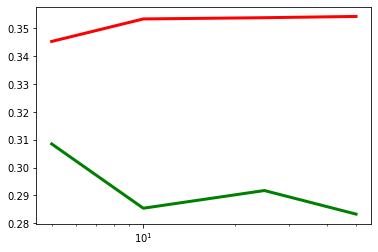

In [18]:
fig, ax = plt.subplots(1,1)

ax.semilogx(bag_numbers, ensemble_training_errors, "g-", lw=3, label = "Training")
ax.semilogx(bag_numbers, ensemble_validation_errors, "r-", lw=3, label = "Validation")


plt.show()

## Creating the final learner!

In [19]:


#Xtr_kaggle = Xtr_kaggle[:,:41]

Xtr_kaggle,Ytr_kaggle = ml.shuffleData(Xtr_kaggle,Ytr_kaggle)

#final_num_bags = 50
#final_classifiers = [None]*final_num_bags

num_bags = 50

num_numeric_learners = int(round(num_bags / 1.5))
num_discrete_learners = int(round(num_bags / 5))
num_binary_learners = int(round(num_bags / 10))
    
# update num bags based on number of learners 
# (only slight deviation based on the algorithm and rounding)
num_bags = num_numeric_learners + num_discrete_learners + num_binary_learners

print(f"# of numeric learners = {num_numeric_learners}")
print(f"# of discrete learners = {num_discrete_learners}")
print(f"# of binary learners = {num_binary_learners}")
print(f"---- Total number of bags for this run: {num_bags}")


classifiers = [None]*num_bags

# keep track of which number classifier we are on
classifiers_index = 0

for i in range(num_numeric_learners):
    #print("classifier index", classifiers_index)
    Xi,Yi = ml.bootstrapData(Xtr, Ytr)

    # insert classifier into list
    classifiers[classifiers_index] = ml.dtree.treeClassify(Xi, Yi, minParent=400, minLeaf=100, maxDepth=50)
    classifiers_index += 1

for i in range(num_discrete_learners):
    #print("classifier index", classifiers_index)
    Xi,Yi = ml.bootstrapData(Xtr, Ytr)

    # insert classifier into list
    classifiers[classifiers_index] = ml.dtree.treeClassify(Xi, Yi, minParent=300, minLeaf=100, maxDepth=10)
    classifiers_index += 1

for i in range(num_binary_learners):
    #print("classifier index", classifiers_index)
    Xi,Yi = ml.bootstrapData(Xtr, Ytr)

    # insert classifier into list
    classifiers[classifiers_index] = ml.dtree.treeClassify(Xi, Yi, minParent=16, minLeaf=50, maxDepth=10)
    classifiers_index += 1


    
    

kaggle_bagged_tree = BaggedTree(classifiers)
kaggle_bagged_tree.classes = np.unique(Ytr_kaggle)



# of numeric learners = 33
# of discrete learners = 10
# of binary learners = 5
---- Total number of bags for this run: 48


### Let's check out some AUC stuff

## Create the final prediction!

In [21]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
Yte_ensemble = np.vstack((np.arange(Xte.shape[0]), kaggle_bagged_tree.predictSoft(Xte)[:,1])).T

np.savetxt('Y_submit_ensemble.txt', Yte_ensemble,'%d, %.2f', header='Id,Predicted', delimiter=',')

0.731!!!!!!!!!!!!!